Here we implement a runge kutta method for solving a system of differential equations.
Given $$y'(t) = f(t,y(t))$$ with initial condition $$y(0) = y_0$$
 
The explicit m-stage runge kutta method is defined as follows:
Let the butcher tableau be 
$$
\begin{bmatrix}
c &|& A \\
\hline
 &|& b^T &\\
\end{bmatrix}
$$
Then the explicit m-stage runge kutta method is defined as:
$$
y_{n+1} := y_n + h_n\Phi(t_n,y_n,h_n) \\
t_{n+1} := t_n + h_n \\
$$

Where 

$$
\Phi(t,y,h) = \sum_{j}^{m} b_k k_j \\
k_i = f(t+ c_i h, y + h\sum_{j=1}^{i-1} A_{ij} k_j)\\
$$

where $a_{kj}$ is the coefficient of the $k$ th derivative of $y$ at the $j$th stage.


### Runge Kutta for linear differential equations:
Sometimes the equation that one considrs is of the form:
$$
\begin{align}
y'(t) &= M_fy(t) \\
\end{align}
$$
(for example when In particular $M_f$ is $\nabla f(y)$ , or even more common when we have to solve some time stepping problem in our FEM model)

Therefore , on the stages, we can perform the following algebraic tricks:

\usepackage{bbold}
$$
\begin{align}
k_{i} &= M[y + h \sum_{j} A_{ij}k_{j}]  &  \text{vector equation for stages}\\
k_{i} &= M[y] + h \sum_{j} A_{ij}\, M \, k_{j} &  \text{associativity} \\
\left(k_{i}\right)_l &=\left( M[y] + h \sum_{j} A_{ij}\, M \, k_{j} \right)_l &  \text{selecting only the l-th row of the j-th vector}\\
k_{li} &=   \sum_r  M_{lr}y_{r}+ h \sum_{j,s} A_{ij}\, M_{ls} \, \left(k_{j}\right)_{s}&  \text{convention $(k_{i})_l = k_{li}$}\\
k_{li} &=  \sum_r M_{lr}y_{r}+ h \sum_{j,s} A_{ij}\, M_{ls} \, k_{sj}& \\
k_{li} - h \sum_{j,s}  M_{ls} \, k_{sj} \, A_{ij}   &=  \sum_r M_{lr}y_{r} 1_i&  \text{Some mixing of the equation}\\
k - MkA^T &= My\otimes \mathbb{1}_m&  \text{Matrix-form equation}\\
I \,k - h (M\otimes A )\, k &= M(y\otimes \mathbb{1}_m)&  \text{Matrix-form equation}\\
k &=\left( I - h M\otimes A \,\right)^{-1} M(y\otimes \mathbb{1}_m)&  \text{Matrix-form equation}\\
\end{align}
$$

Where $I$ is the identity matrix of dimension $ d\cdot m \times  d\cdot m $ and   $M\otimes A$ is the tensor product of $M$ and $A$; Also $\mathbb{1}_m  = (1 , ... , 1)$ for m- times.


Therefore for each time step we calculate the following:
$$
\begin{align}
k &= \left( I - h M\otimes A \,\right)^{-1} M(y\otimes \mathbb{1}_m)&  \text{Matrix-form equation}\\
y^{n+1} &= y^n + h k b &  \text{vector equation for stages}\\
\end{align}
$$



The butcher tableau are stored in the following format: 
**butcher_tableau = [c,A,b]**

where c is a vector of length m, A is a mxm matrix, and b is a m vector.

The following method can work with any m-stage runge kutta method of the following form:
1. Explicit m-stage runge kutta method
2. Embedded m-stage runge kutta method
3. Implicit m-stage runge kutta method

for a quick lecture of all the possible coices of butcher  tableau see:
https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods








In [109]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# create a function that given a butcher tableau tells you if it is explicit = True or implicit = False
def isExplicit(a):
    for i in np.arange(len(a)):
        for j in np.arange(i,len(a)):
            if a[i,j] != 0:
                return False
    return True

def vec(M): # matbe it need to be transposed before
    #return np.reshape(M.transpose(),(len(M)*len(M[0]),1))
    return M.flatten("F")

def vecInverse(v , row): 
    # returs the transpose of matrix col x row 
    return np.reshape(v,(int(len(v)/row),row)).transpose()

# create a function that given a butcher tableau c|A/b and a vector of initial conditions, returns the solution of the ODE calculated with the Runge-Kutta method
def RungeKutta(M , tau = None ,t_0 = 0,  t_final = None , butcher_tableau = np.array([np.array([0]),np.array([0]),np.array([1])]), y_0  = None, steps = None , draw = False , sol = None):
    """
    :param tau: the time step
    :param t_final: the final time
    :param butcher_tableau: the butcher tableau written in the form c|A/b
    :param y_0: the initial conditions for the ode
    :return: the solution of the ODE
    """
    input("1")

    if len(butcher_tableau) == 3:
        c,a,b = butcher_tableau
    input("2")
    
    if len(butcher_tableau) == 4:
        c,a,b ,b_star = butcher_tableau
    input("3")
    
    if tau == None and t_final == None and steps == None :
        raise ValueError("the following combinations are possible : \
        [tau,t_final]\
        [steps,tau]\
        [steps,t_final]\
        ")
    input("5")

    if tau == None :
        tau = float(t_final - t_0)/float(steps)
        input("6")
    elif t_final == None:
        t_final = t_0 + steps*tau
        input("7")
    elif steps == None:
        steps = (t_final - t_0)/tau
        input("8")

    y = [y_0]
    #print("initial position : \n" ,y[-1])

    m = len(a)
    #print("dimension of butcher tableau \n: " ,m)

    d = len(M)
    #print("dimension of the ODE : \n" ,d)

    # RHS matrix
    RHS_matrix = np.identity(m*d)-tau*np.kron(a,M)
    input("G")

    #print("RHS matrix : \n" ,RHS_matrix)
    #print("RHS matrix inverse : \n" ,inv(RHS_matrix))


    # Iteration Matrix
    input("F")

    iter_matrix = inv(RHS_matrix)
    #print("iteration matrix : \n" ,iter_matrix)
    input("A")
    for i in range(int(steps)):
        input("B")
        vec_y_1mT = np.kron(np.ones(m), M.dot(y[-1]))
        #print("The matrix for the y vector : \n" ,np.kron(y[-1], np.ones((1,m))))
        #print("vec_y_1mT : \n" ,vec_y_1mT)
        input("")
        k =  vecInverse( iter_matrix.dot(vec_y_1mT) , d) 
        #print("k in vector form" ,iter_matrix.dot(vec_y_1mT))
        #print("k : \n" ,k)
        input("D")
        
        y.append(y[-1]+ tau* k.dot(b))
        input("E")

        #print("y : \n" ,y[-1])
    return y

### create a function that returns the Heun iteration for the ODE ###
def HeunSolver(M,steps , tau, y_0):
    y = [y_0]
    for i in range(steps):
        y_1 = y[-1] + tau*M.dot(y[-1])
        y.append(y[-1] + tau*(M.dot(y[-1]) + M.dot(y_1))/2)
    return y



In [110]:

#Butcher tableau for Crank-Nicolson method
def CrankNicolson():
    c = np.array([1 , 1])
    a = np.array([[0.5 , 0] , [0 , 0.5]])
    b = np.array([0.5 , 0.5])
    return [c,a,b]
def Heun():
    c = np.array([0 , 1])
    a = np.array([[0 , 0] , [1 , 0]])
    b = np.array([1/2, 1/2])
    return [c,a,b]

def RK4():
    c = np.array([0 , 1/2 , 1/2 , 1])
    a = np.array([[0 , 0 , 0 , 0] , [1/2 , 0 , 0 , 0] , [0 , 1/2 , 0 , 0] , [0 , 0 , 1 , 0]])
    b = np.array([1/6, 1/3, 1/3, 1/6])
    return [c,a,b]
def GaussLegendre4():
    c = np.array([1/2 - 3**(1/2)/6 , 1/2 + 3**(1/2)/6])
    a = np.array([[1/4 , 1/4  - 3**(1/2)/6] , [1/4  - 3**(1/2)/6 , 1/4]])
    b = np.array([0.5 , 0.5])
    b_star = np.array([1/2 + 3**(1/2)/6, 1/2 - 3**(1/2)/6])
    return [c,a,b, b_star]

tau = 1/5
y_0  = [1,1 , 1]
draw = True
steps = 10

M_f = np.array([[1.0 , 0 , 0 ] , [0 , -1.0 , 0] , [0 , 0 , 0]])


y1 = RungeKutta(M = M_f , tau = tau ,t_0 = 0 , butcher_tableau = CrankNicolson() , y_0  = y_0, steps = steps , draw = True )
y2 = HeunSolver(M = M_f,steps =steps , tau= tau, y_0=y_0)
#y2 = RungeKutta(M = M_f , tau = tau ,t_0 = 0 , butcher_tableau = RK4() , y_0  = y_0, steps = 500 , draw = True )
#y3 = RungeKutta(M = M_f , tau = tau ,t_0 = 0 , butcher_tableau = GaussLegendre4() , y_0  = y_0, steps = 500 , draw = True )


KeyboardInterrupt: Interrupted by user

general method 0.07214481713445811
distance simple heun 0.12260507268561077


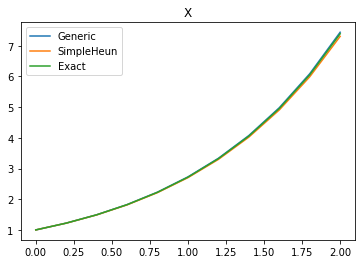

general method 0.0033262957128555796
distance simple heun 0.007731696008084485


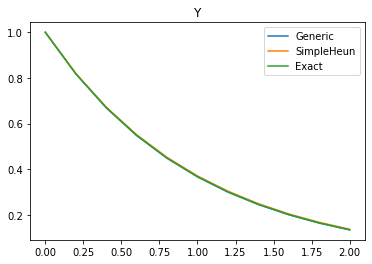

general method 0.0
distance simple heun  0.0


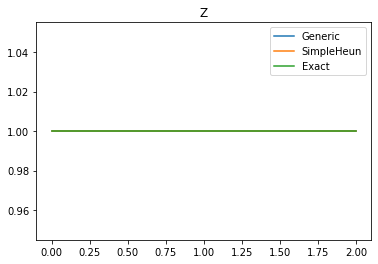

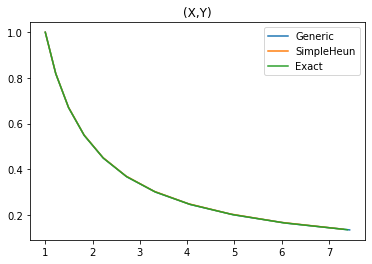

distance general method 0.07222145721690862
distance  simple heun  0.12284861810946565


In [106]:
def dist(A, B):
    return np.sqrt(np.sum((np.array(A) - np.array(B) )*(np.array(A) - np.array(B) )))
# is it a good sol?

Sol_X =[]
Sol_Y =[]
Sol_Z =[]

T = []

X1 = []
Y1 = []
Z1 = []

X2 = []
Y2 = []
Z2 = []

#X3 = []
#Y3 = []
#Z3 = []

for i in range(len(y1)):
    T.append(i*tau)
    X1.append(y1[i][0])
    Y1.append(y1[i][1])
    Z1.append(y1[i][2])
    X2.append(y2[i][0])
    Y2.append(y2[i][1])
    Z2.append(y2[i][2])
#    X3.append(y3[i][0])
#    Y3.append(y3[i][1])
#    Z3.append(y3[i][2])
    
    Sol_X.append(np.exp(i*tau))
    Sol_Y.append(np.exp(-i*tau))
    Sol_Z.append(1)

print("general method" , dist(X1, Sol_X))
print("distance simple heun" , dist(X2, Sol_X))
#print("distance  exact sol" , dist(X3, Sol_X))
plt.plot(T,X1)
plt.plot(T,X2)
#plt.plot(T,X3)
plt.plot(T,Sol_X)
plt.legend(["Generic","SimpleHeun","Exact"])
plt.title("X")
plt.show()

print("general method" , dist(Y1, Sol_Y))
print("distance simple heun" , dist(Y2, Sol_Y))
#print("distance  exact sol" , dist(Y3, Sol_Y))
plt.plot(T,Y1)
plt.plot(T,Y2)
#plt.plot(T,Y3)
plt.plot(T,Sol_Y)
plt.legend(["Generic","SimpleHeun","Exact"])
plt.title("Y")
plt.show()

print("general method" , dist(Z1, Sol_Z))
print("distance simple heun " , dist(Z2, Sol_Z))
#print("distance  exact sol" , dist(Z3, Sol_Z))
plt.plot(T,Z1)
plt.plot(T,Z2)
#plt.plot(T,Z3)
plt.plot(T,Sol_Z)
plt.legend(["Generic","SimpleHeun","Exact"])
plt.title("Z")
plt.show()


plt.plot(X1,Y1)
plt.plot(X2,Y2)
#plt.plot(X3,Y3)
plt.plot(Sol_X,Sol_Y)
plt.legend(["Generic","SimpleHeun","Exact"])
plt.title("(X,Y)")
plt.show()


# is it a good sol?
print("distance general method",dist(np.array([Sol_X, Sol_Y ,Sol_Z]),np.array([X1, Y1 ,Z1]) ))
print("distance  simple heun ",dist(np.array([Sol_X, Sol_Y ,Sol_Z]),np.array([X2, Y2 ,Z2]) ))


In [ ]:
x = np.array([1 ,2 ,3])
A = np.array([[1 ,2 ,3] , [4 ,5 ,6] , [7 ,8 ,9]])

print(A , x ,"=",  A.dot(x))
print(x , A ,"=", x.dot(A))

[[1 2 3]
 [4 5 6]
 [7 8 9]] [1 2 3] = [14 32 50]
[1 2 3] [[1 2 3]
 [4 5 6]
 [7 8 9]] = [30 36 42]
